In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


## Country Population & Population Growth

In [5]:
q = "SELECT * FROM facts"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,3.256434e+07,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3.029278e+06,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,3.954217e+07,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,8.558000e+04,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,1.962535e+07,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,9.243600e+04,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,4.343189e+07,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743.0,28203.0,1540.0,3.056382e+06,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220.0,7682300.0,58920.0,2.275101e+07,1.07,12.15,7.14,5.65
9,10,au,Austria,83871.0,82445.0,1426.0,8.665550e+06,0.55,9.41,9.42,5.56


In [6]:
q_min_population = "SELECT MIN(population) FROM facts;"
q_max_population = "SELECT MAX(population) FROM facts;"
q_min_population_growth = "SELECT MIN(population_growth) FROM facts;"
q_max_population_growth = "SELECT MAX(population_growth) FROM facts;"

In [7]:
pd.read_sql_query(q_min_population, conn)
pd.read_sql_query(q_max_population, conn)
pd.read_sql_query(q_min_population_growth, conn)
pd.read_sql_query(q_max_population_growth, conn)

,MAX(population_growth)
0,4.02


In [8]:
q = "select name from facts where population=0;"
pd.read_sql_query(q, conn)

,name
0,Antarctica


In [9]:
q = "select name from facts where population=(SELECT MAX(population) FROM facts);"
pd.read_sql_query(q, conn)

,name
0,World


Looking into the population with the extreme numbers, we found that Antarctica has no residence and the world has more than 7 billion people. This makes total sense. However, we should probably exclude these two from further analysis. 

In [17]:
q = "select population, population_growth, birth_rate, death_rate from facts where population NOT IN ((SELECT MAX(population) FROM facts), (SELECT MIN(population) FROM facts));"

res=pd.read_sql_query(q, conn)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1220b4c88>,
      dtype=object)

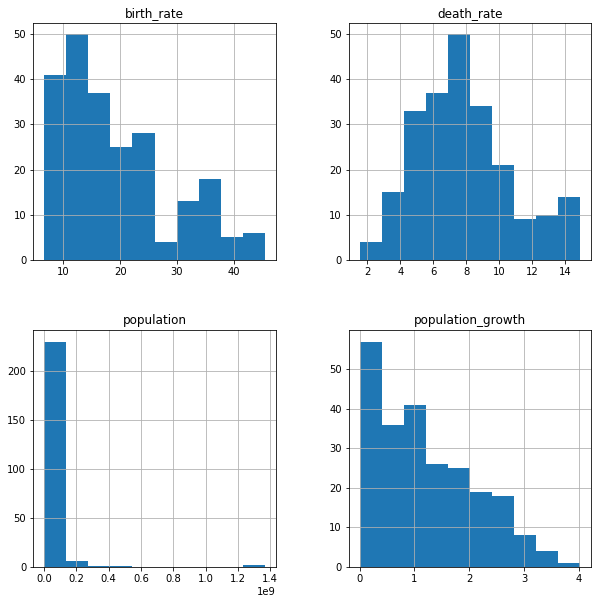

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q = '''
select population, population_growth, birth_rate, death_rate
from facts
where population NOT IN 
((SELECT MAX(population) FROM facts), (SELECT MIN(population) FROM facts));
'''
pd.read_sql_query(q, conn).hist(ax=ax)

## Population density

In [29]:
q ="""
    SELECT name, population/area_land as density 
    FROM facts 
    WHERE density<>'NaN'
    ORDER BY density DESC;
"""
pd.read_sql_query(q, conn)

,name,density
0,Macau,21168
1,Monaco,15267
2,Singapore,8259
3,Hong Kong,6655
4,Gaza Strip,5191
5,Gibraltar,4876
6,Bahrain,1771
7,Maldives,1319
8,Malta,1310
9,Bermuda,1299


Population density of the world is ranging from more than 20,000 person per km sq to zero. The highest density come from Macau which is about 30% higher than the runner-up, Monaco, which is almost double that of Singapore. 

Out of the top four countries/areas with the highest population density, three of them are from Asia. Both Macau and HongKong are special areas of P.R China. All the countries/areas on the top of the list have relatively small land areas and most of with realive high GDP. While on the other end of the spectrum, those are places with large land areas (e.g. Canada and Australia) or inhabitable land (e.g. Western Sahara and Greenland). 

##  Population growth in Absolute Value

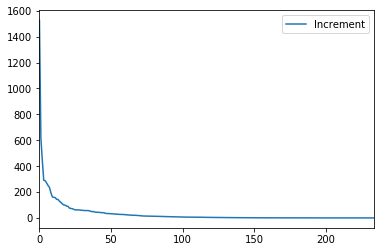

In [40]:
q ="""
    SELECT name, population * population_growth/100/10000 as Increment 
    FROM facts 
    WHERE Increment <> 'NaN' AND name <> 'World'
    ORDER BY Increment DESC;
"""
pd.read_sql_query(q, conn).plot()

India is the biggest contributor to the world population increase. The yearly population increase of India is more than double that of China the runner-up in this *competition*. The main drivers of the population increase worldwide are developing countries, except the United States which occupies the 6th place of the list. 

##  Water to Land Ratio

In [44]:
q ="""
    SELECT name, cast(area_water as float) / cast(area_land as float) * 100 as water_land_ratio 
    FROM facts 
    WHERE area_land <> 'NaN' AND area_land <> 0.0
    ORDER BY water_land_ratio DESC;
"""
pd.read_sql_query(q, conn)

,name,water_land_ratio
0,British Indian Ocean Territory,90566.666667
1,Virgin Islands,452.023121
2,Puerto Rico,55.479143
3,"Bahamas, The",38.661339
4,Guinea-Bissau,28.467283
5,Malawi,25.939626
6,Netherlands,22.571032
7,Uganda,22.292237
8,Eritrea,16.435644
9,Liberia,15.623962


In [46]:
q ="""
SELECT  sub.remark, COUNT(sub.name) as number_of_countries 
    FROM
        (SELECT name, cast(area_water as float) / cast(area_land as float) * 100 as water_land_ratio,
        CASE WHEN cast(area_water as float) / cast(area_land as float)>1 
            THEN 'water > land'
            WHEN cast(area_water as float) / cast(area_land as float)<1 
                AND cast(area_water as float) / cast(area_land as float)>0
            THEN '0 < water < land'
            WHEN cast(area_water as float) / cast(area_land as float)=0.0
            THEN 'no water'
            WHEN cast(area_water as float) / cast(area_land as float)='NaN'
            THEN 'No Info'
            ELSE 'Other'
            END as remark
        FROM facts 
        WHERE area_land <> 'NaN' AND area_land <> 0.0) sub
    GROUP by sub.remark
    ORDER BY number_of_countries DESC;
"""
pd.read_sql_query(q, conn)

,remark,number_of_countries
0,0 < water < land,150
1,no water,89
2,Other,4
3,water > land,2


British Indian Ocean Territory and Virgin Islands are the only two places with more water than land. While most of the places have larger portion of their territery as land, some close to 90 regions/countries have no water at all. 

## Water to Population Ratio

In [54]:
q ="""
    SELECT name, 
        CASE WHEN  population = 0.0
            THEN "None"
            WHEN population = 'NaN' OR area_water = 'NaN'
            THEN "Unknown"
            ELSE cast(area_water as float)/cast(population as float) * 1000000
            END as water_pop_ratio 
    FROM facts 
    WHERE water_pop_ratio <> 'None' and water_pop_ratio <> 0.0
    ORDER BY water_pop_ratio DESC;
"""
pd.read_sql_query(q, conn)

,name,water_pop_ratio
0,Canada,25389.377888
1,Guyana,24645.617242
2,Virgin Islands,15100.314751
3,Suriname,13491.295354
4,"Bahamas, The",11922.476178
5,Iceland,8285.178869
6,Botswana,6872.162656
7,Finland,6268.119210
8,Gabon,5863.947046
9,Russia,5058.846461


In total, we have calculated population to water_area ratio for 152 countries. People in Canada and Guyana have the highest per person water area occupation while Singapore has the lowest. 